In [48]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
m_d = pd.read_csv(mouse_drug_data_to_load, encoding="ISO-8859-1")
c_t = pd.read_csv(clinical_trial_data_to_load, encoding="ISO-8859-1")
# Combine the data into a single dataset
md_ct = m_d.merge(c_t,how ='outer')
# Display the data table for preview
md_ct.head(5)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [25]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
TRT = md_ct.groupby(['Drug', 'Timepoint'])
Mean_Tumor_Volume = TRT["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
TRT_Mean = pd.DataFrame({"Tumor Volume (mm3)": Mean_Tumor_Volume})
TRT_Mean.reset_index(inplace=True)
# Preview DataFrame
TRT_Mean.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SE_Tumor_Volume = TRT["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
TRT_SE = pd.DataFrame({"SE of Tumor Volume (mm3)": SE_Tumor_Volume})
TRT_SE.reset_index(inplace=True)
# Preview DataFrame
TRT_SE.head(5)

,Drug,Timepoint,SE of Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames
SE_Data =TRT_SE.pivot(index='Timepoint', columns='Drug', values='SE of Tumor Volume (mm3)')
# Preview that Reformatting worked
SE_Data.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [9]:
# For Plot
Count_Tumor_Volume = TRT["Tumor Volume (mm3)"].count()
TRT_Plot = pd.DataFrame({"Tumor Volume (mm3)": Count_Tumor_Volume})
TRT_Plot.reset_index(inplace=True)
TRT_Plot = TRT_Plot.pivot(index='Timepoint', columns='Drug', values= 'Tumor Volume (mm3)')
TRT_Plot = TRT_Plot.iloc[:, [0,2,3,5]]
TRT_Plot.head(5)


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


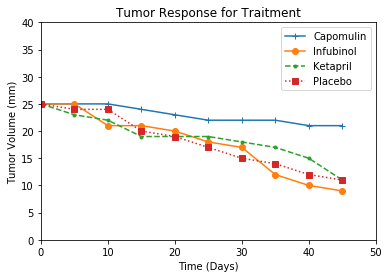

In [10]:
TRT_Plot.plot(style=['+-','o-','.--','s:'])
plt.legend()
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm)")
plt.title('Tumor Response for Traitment')
plt.xlim(0, 50)
plt.ylim(0, 40)
plt.savefig("../Images/TRT.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Mean_Metastatic_Sites = TRT["Metastatic Sites"].mean()
# Convert to DataFrame
MRT_Mean = pd.DataFrame({"Metastatic Sites": Mean_Metastatic_Sites})
MRT_Mean.reset_index(inplace=True)
# Preview DataFrame
MRT_Mean.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_MRT = TRT["Metastatic Sites"].sem()
# Convert to DataFrame
MRT_SE = pd.DataFrame({"Metastatic Sites": SE_MRT})
#MRT_Mean.reset_index(inplace=True)
# Preview DataFrame
MRT_SE.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
#MRT_SE = pd.DataFrame({"Metastatic Sites": SE_MRT})
MRT_SE.reset_index(inplace=True)
# Preview DataFrame
MRT_SE.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [14]:
# Minor Data Munging to Re-Format the Data Frames
MRT_SE = MRT_SE.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
MRT_SE.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [15]:
MRT_Plot = MRT_SE.iloc[:, [0,2,3,5]]
MRT_Plot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


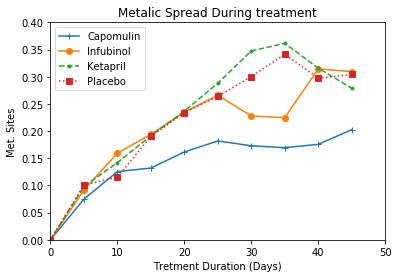

In [16]:
# Generate the Plot (with Error Bars)

#MRT_Plots = MRT_Plot.iloc[:, [0,2,3,5]]
MRT_Plot.plot(style=['+-','o-','.--','s:'])
plt.legend()
plt.xlabel("Tretment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title('Metalic Spread During treatment')
plt.xlim(0, 50)
plt.ylim(0, .4)
plt.savefig("../Images/MSDT.png")
plt.show()



## Survival Rates

In [49]:
Mouse_Count = TRT["Mouse ID"].count()
SR_Count = pd.DataFrame({"Mouse Count": Mouse_Count})
SR_Count.reset_index(inplace=True)
SR_Count.head(5)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [50]:
SR_ = SR_Count.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
SR_.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [51]:
SR_ = SR_.iloc[:, [0,2,3,5]]
SR_.head(5)

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


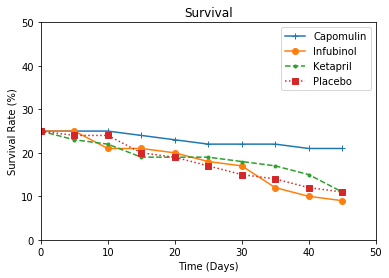

In [52]:
SR_.plot(style=['+-','o-','.--','s:'])

plt.legend()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title('Survival')
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.savefig("../Images/Survival.png")
plt.show()


## Summary Bar Graph

In [33]:
md_ct.head(3)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0


In [13]:
sss = md_ct[md_ct['Timepoint']==45]

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

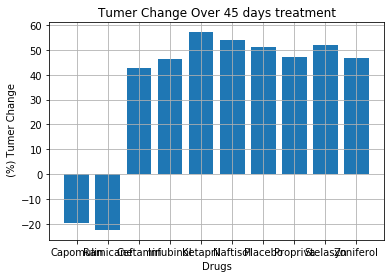

In [46]:
# Store all Relevant Percent Changes into a Tuple
yaxis = (-19.475303,-22.320900,42.516492,46.123472,57.028795,53.923347,51.297960,47.241175,52.085134,46.579751)


xaxis = ['Capomulin','Ramicane','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Stelasyn','Zoniferol']   
plt.bar(xaxis,yaxis)
plt.xlabel("Drugs")
plt.ylabel(" (%) Tumer Change")
plt.title('Tumer Change Over 45 days treatment')
plt.savefig("../Images/PercentageChange.png")
plt.grid()
plt.show



In [53]:
import os
os.getcwd()

'C:\\Users\\badr3\\desktop\\Homework 4\\Pymaceuticals'